In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
#from sklearn.utils._param_validation import MissingValues
from imblearn.under_sampling import NearMiss
from sklearn.metrics import classification_report

In [4]:
company = pd.read_csv('Company_Data.csv')

In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

**Feature Engineering**

In [7]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
company1=company.copy()
company1['Sales_cat'] = pd.cut(x = company1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
company1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [8]:
company.duplicated().any()

False

In [9]:
cat_values=[]
for i in company.columns:
    if(company[i].nunique()<10):
        cat_values.append(i)
cat_values

['ShelveLoc', 'Education', 'Urban', 'US']

In [10]:
numerical_values=[]
for i in company.columns:
    if(company[i].nunique()>10):
        numerical_values.append(i)
numerical_values

['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age']

In [11]:
# function takes a single dataframe column name as argument and
# plots a 1 x 2 subplot contains (pie plot and bar plot)
def plot_categorial(col_name):
    fig, ax = plt.subplots(
        nrows=1, ncols=2, figsize=(14, 5)
    )  # sets 1 x 2 subplots with figure size of (14,5)
    company1[col_name].value_counts().plot.pie(

        labels=company1[col_name].unique(),
        shadow=True,
        startangle=180,
        ax=ax[0],
    )  # plots pie chart of given column with % percentage

    company1[col_name].value_counts().plot.bar(
        ax=ax[1]
    )

    fig.suptitle(col_name.title())  # set plot's title
    plt.show()  # shows the plot

In [12]:
# function takes a single dataframe column name as argument and
# plots a single plot contains kernel density estimate plot
def plot_kde(col_name):
    facet = sns.FacetGrid(
        company1, hue="Sales_cat", aspect=4, palette="bright"
    )  # sets a seaborn FacetGrid with hue = "Outcome" and palette as "bright"
    facet.map(
        sns.kdeplot, col_name, shade=True
    )  # kernel density plot of the given dataframe column respect to the dependent column "ShelveLoc"
    facet.set(
        xlim=(0, company[col_name].max())
    )  # sets the x axis from 0 to maximum value of the column
    facet.add_legend()  # add legend to the plot
    plt.title(
        col_name + " respect to Outcome"
    )  # sets the title for the plot as "<column name> respect to Outcome"
    plt.show()  # shows the plot

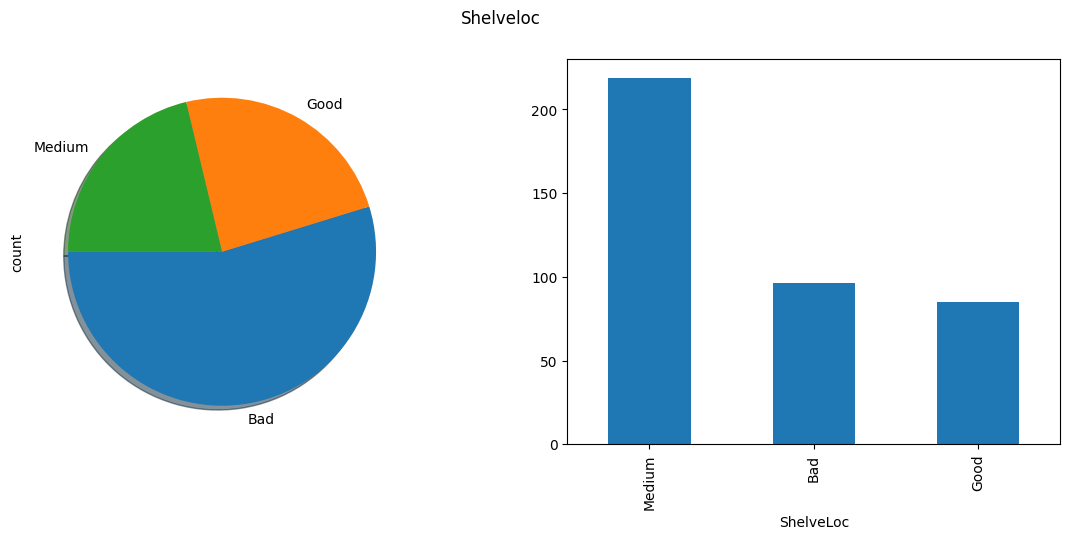

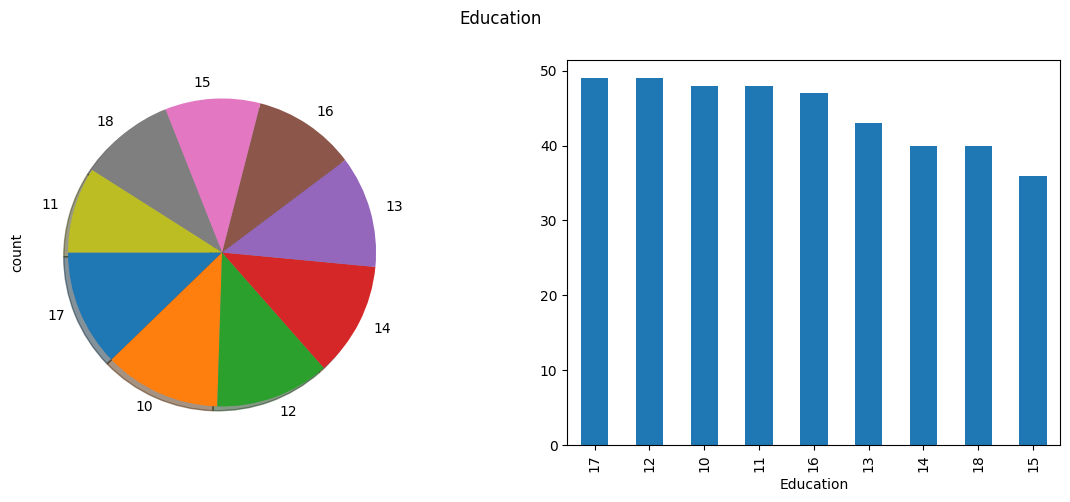

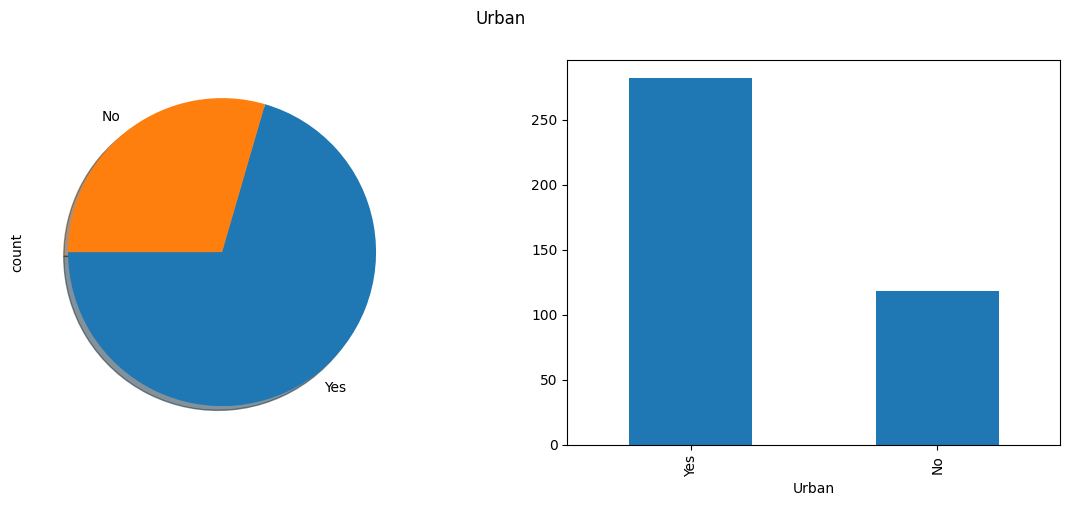

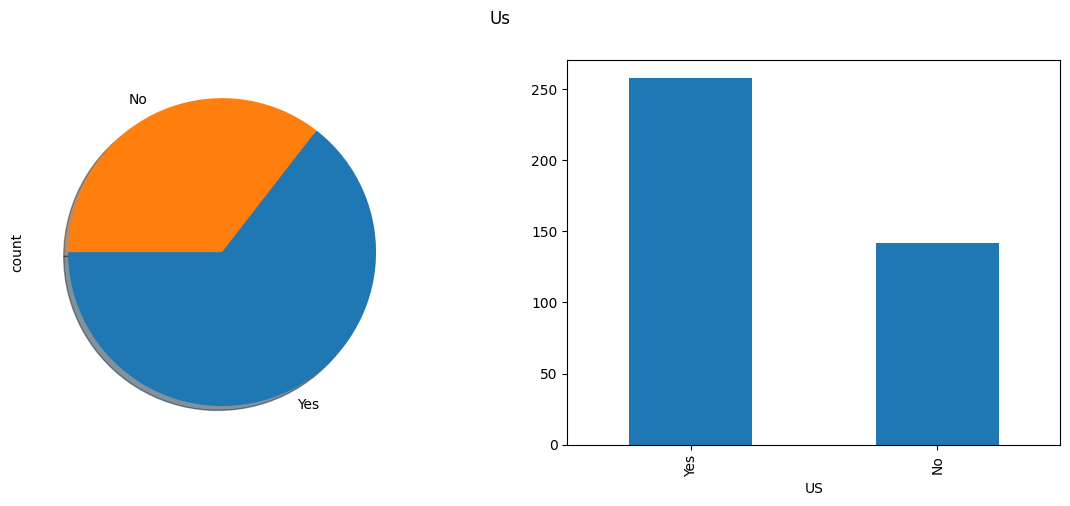

In [13]:
for i in cat_values:
    plot_categorial(i)

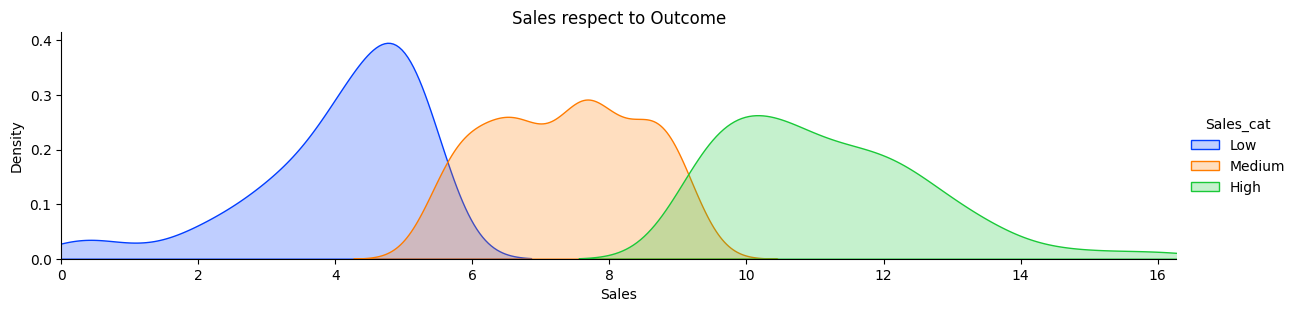

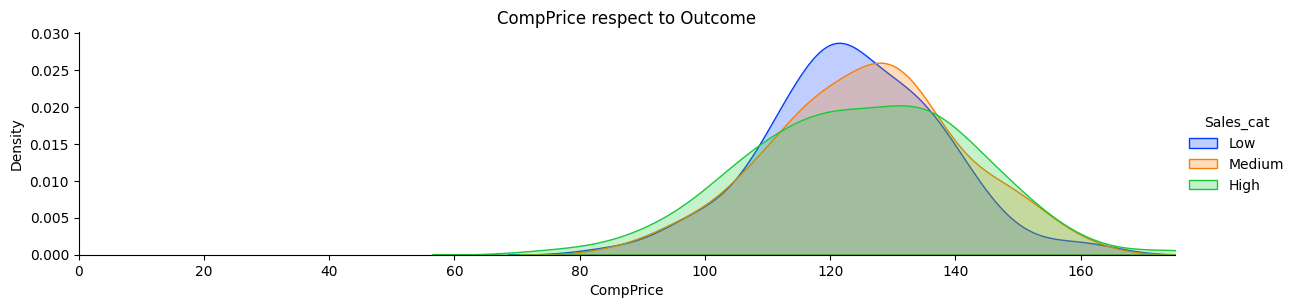

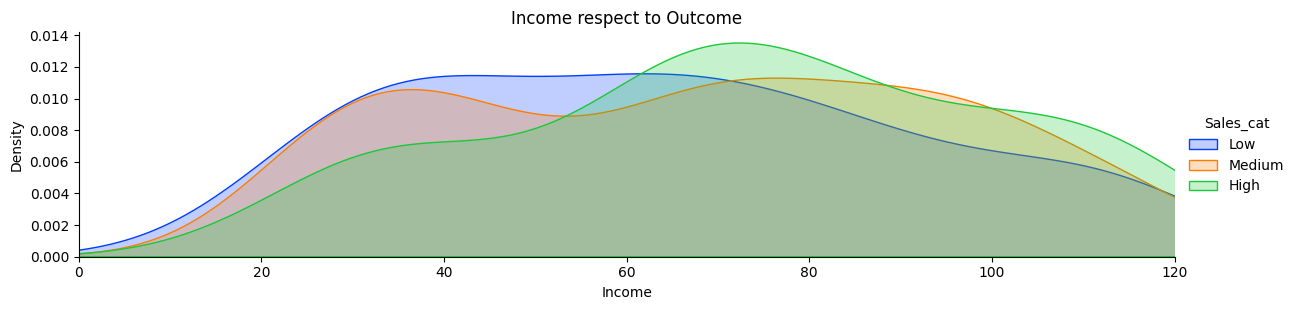

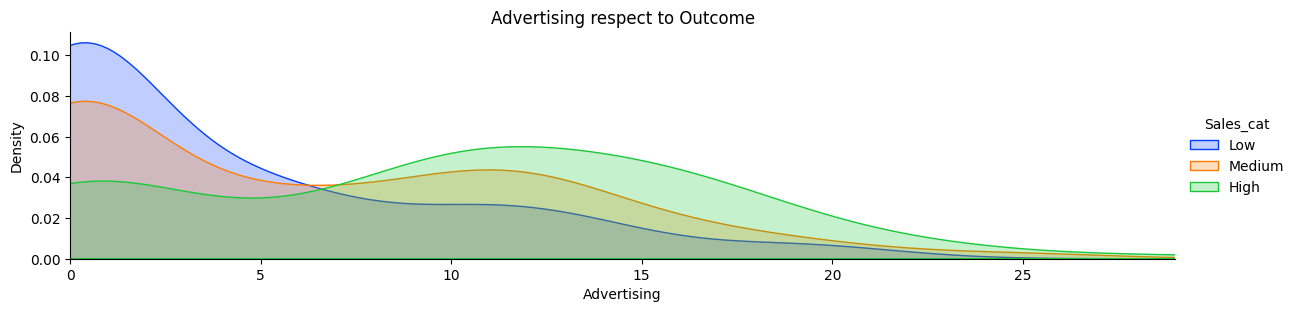

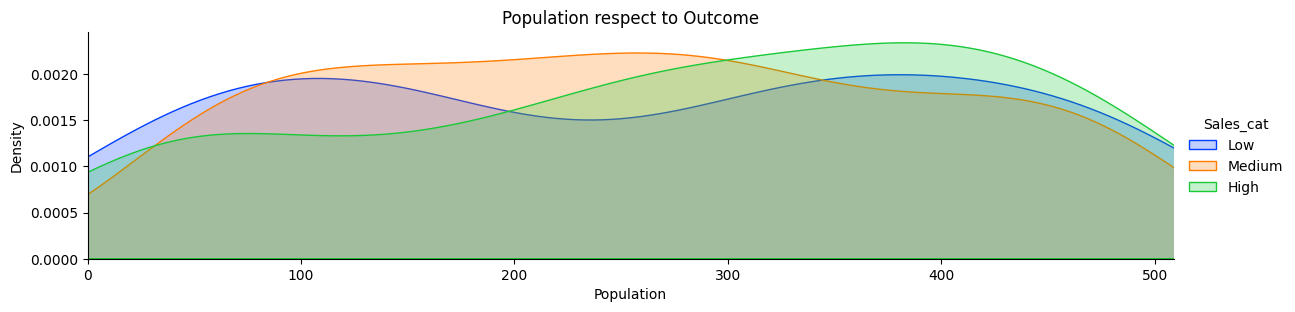

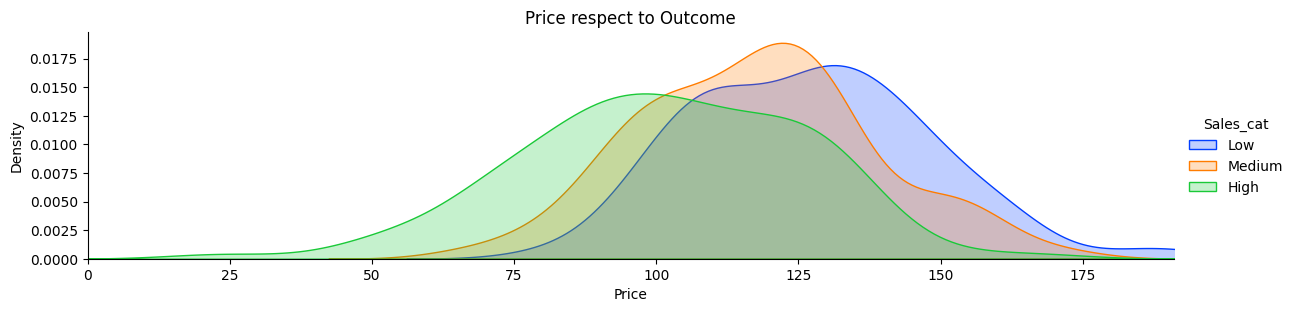

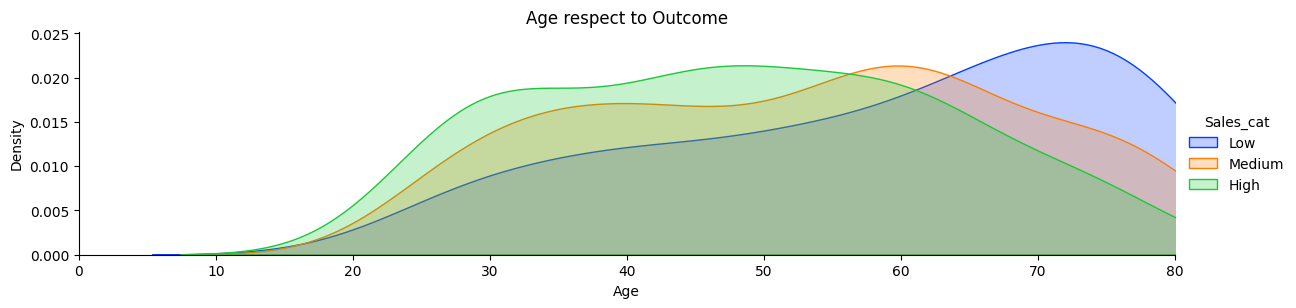

In [14]:
for i in numerical_values:
    plot_kde(i)

Text(0.5, 1.0, 'Education')

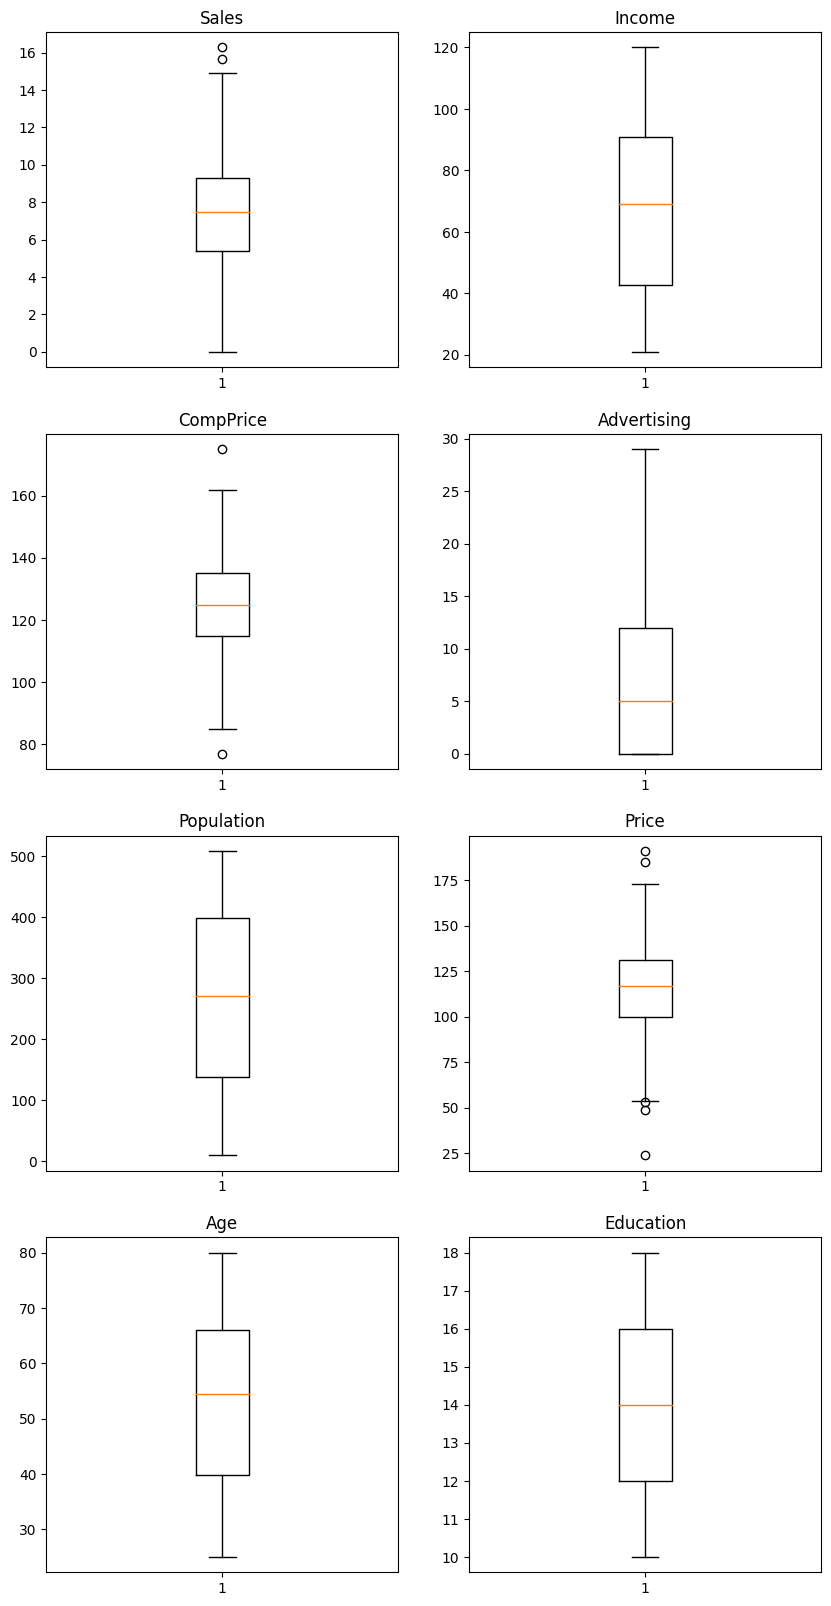

In [15]:
fig,axs=plt.subplots(4,2,figsize=(10,20))
axs[0,0].boxplot(company.Sales)
axs[0,1].boxplot(company.Income)
axs[1,0].boxplot(company.CompPrice)
axs[1,1].boxplot(company.Advertising)
axs[2,0].boxplot(company.Population)
axs[2,1].boxplot(company.Price)
axs[3,0].boxplot(company.Age)
axs[3,1].boxplot(company.Education)
axs[0,0].set_title("Sales")
axs[0,1].set_title("Income")
axs[1,0].set_title("CompPrice")
axs[1,1].set_title("Advertising")
axs[2,0].set_title("Population")
axs[2,1].set_title("Price")
axs[3,0].set_title("Age")
axs[3,1].set_title("Education")

In [16]:
company1.Sales_cat.value_counts()

Sales_cat
Medium    198
High      102
Low       100
Name: count, dtype: int64

In [17]:
company1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


### Converting categorical into numerical

In [18]:
company2=company1.iloc[:,:-1]
company2=company1.drop('Sales',axis=1)
company2['Sales']=company1.Sales_cat
company2.head()

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120       Bad   42   
1        111      48           16         260     83      Good   65   
2        113      35           10         269     80    Medium   59   
3        117     100            4         466     97    Medium   55   
4        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat   Sales  
0         17   Yes  Yes      High    High  
1         10   Yes  Yes      High    High  
2         12   Yes  Yes      High    High  
3         14   Yes  Yes    Medium  Medium  
4         13   Yes   No       Low     Low

In [19]:
le=LabelEncoder()

In [20]:
categorical_features = company2.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat', 'Sales'], dtype='object')

In [21]:
for i in categorical_features:
  company2[i]=le.fit_transform(company2[i])
company2.head()

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0        138      73           11         276    120          0   42   
1        111      48           16         260     83          1   65   
2        113      35           10         269     80          2   59   
3        117     100            4         466     97          2   55   
4        141      64            3         340    128          0   38   

   Education  Urban  US  Sales_cat  Sales  
0         17      1   1          0      0  
1         10      1   1          0      0  
2         12      1   1          0      0  
3         14      1   1          2      2  
4         13      1   0          1      1

In [22]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [23]:
# split into input (X) and output (y) variables
X = company2.iloc[:, :-1]

y=  company2['Sales']

In [24]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [25]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [26]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score      Feature
4   300.881058        Price
2   251.767458  Advertising
10  223.354839    Sales_cat
3   141.113336   Population
6   106.577639          Age
1    65.145403       Income
5    14.307108    ShelveLoc
9     7.215106           US
0     2.253637    CompPrice
7     0.689685    Education
8     0.068520        Urban

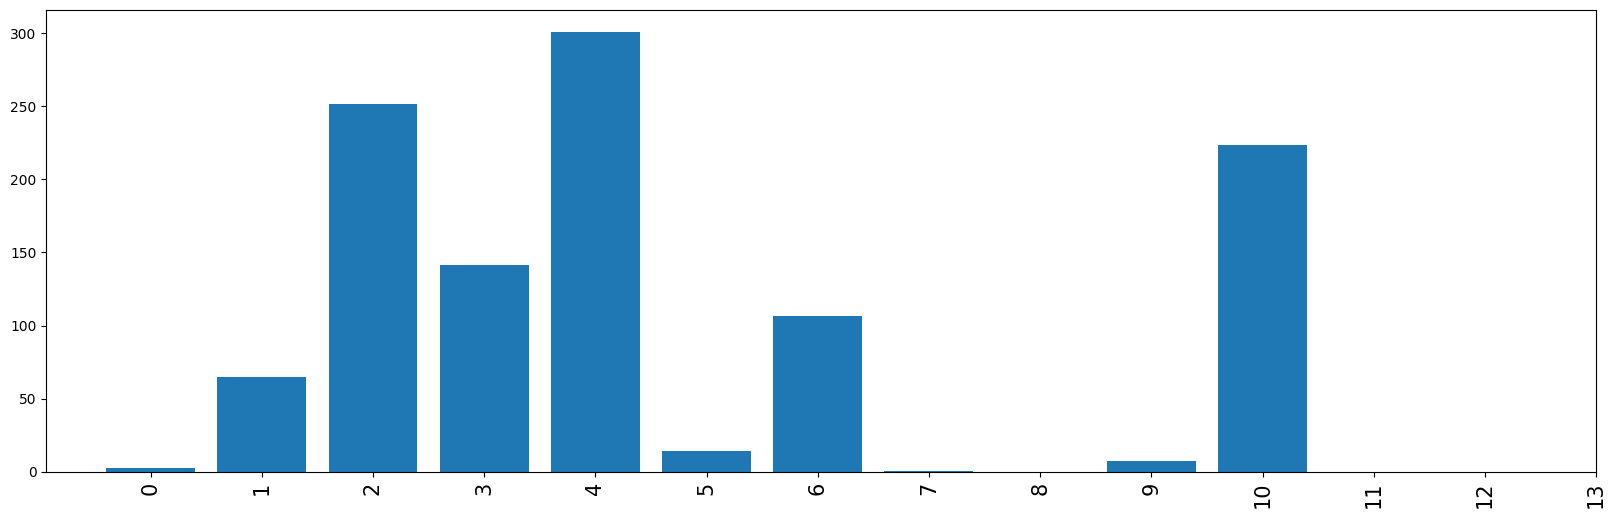

In [27]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])

plt.xticks(rotation = 90, size = 15)
plt.show()

In [28]:
company2.columns

Index(['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US', 'Sales_cat', 'Sales'],
      dtype='object')

In [29]:
company2

CompPrice  Income  Advertising  Population  Price  ShelveLoc  Age  \
0          138      73           11         276    120          0   42   
1          111      48           16         260     83          1   65   
2          113      35           10         269     80          2   59   
3          117     100            4         466     97          2   55   
4          141      64            3         340    128          0   38   
..         ...     ...          ...         ...    ...        ...  ...   
395        138     108           17         203    128          1   33   
396        139      23            3          37    120          2   55   
397        162      26           12         368    159          2   40   
398        100      79            7         284     95          0   50   
399        134      37            0          27    120          1   49   

     Education  Urban  US  Sales_cat  Sales  
0           17      1   1          0      0  
1           10      1   1          0      0  
2           12      1   1          0      0  
3           14      1   1          2      2  
4           13      1   0          1      1  
..         ...    ...  ..        ...    ...  
395         14      1   1          0      0  
396         11      0   1          2      2  
397         18      1   1          2      2  
398         12      1   1          2      2  
399         16      1   1          0      0  

[400 rows x 12 columns]

In [30]:
model_data = company2[['CompPrice', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc','Sales']]
model_data.head()

CompPrice  Advertising  Population  Income  Age  ShelveLoc  Sales
0        138           11         276      73   42          0      0
1        111           16         260      48   65          1      0
2        113           10         269      35   59          2      0
3        117            4         466     100   55          2      2
4        141            3         340      64   38          0      1

In [31]:
x = model_data.drop('Sales',axis=1)
y = model_data['Sales']

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=45)
X_train.shape

(320, 11)

In [36]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [37]:
model=DecisionTreeClassifier()

In [38]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

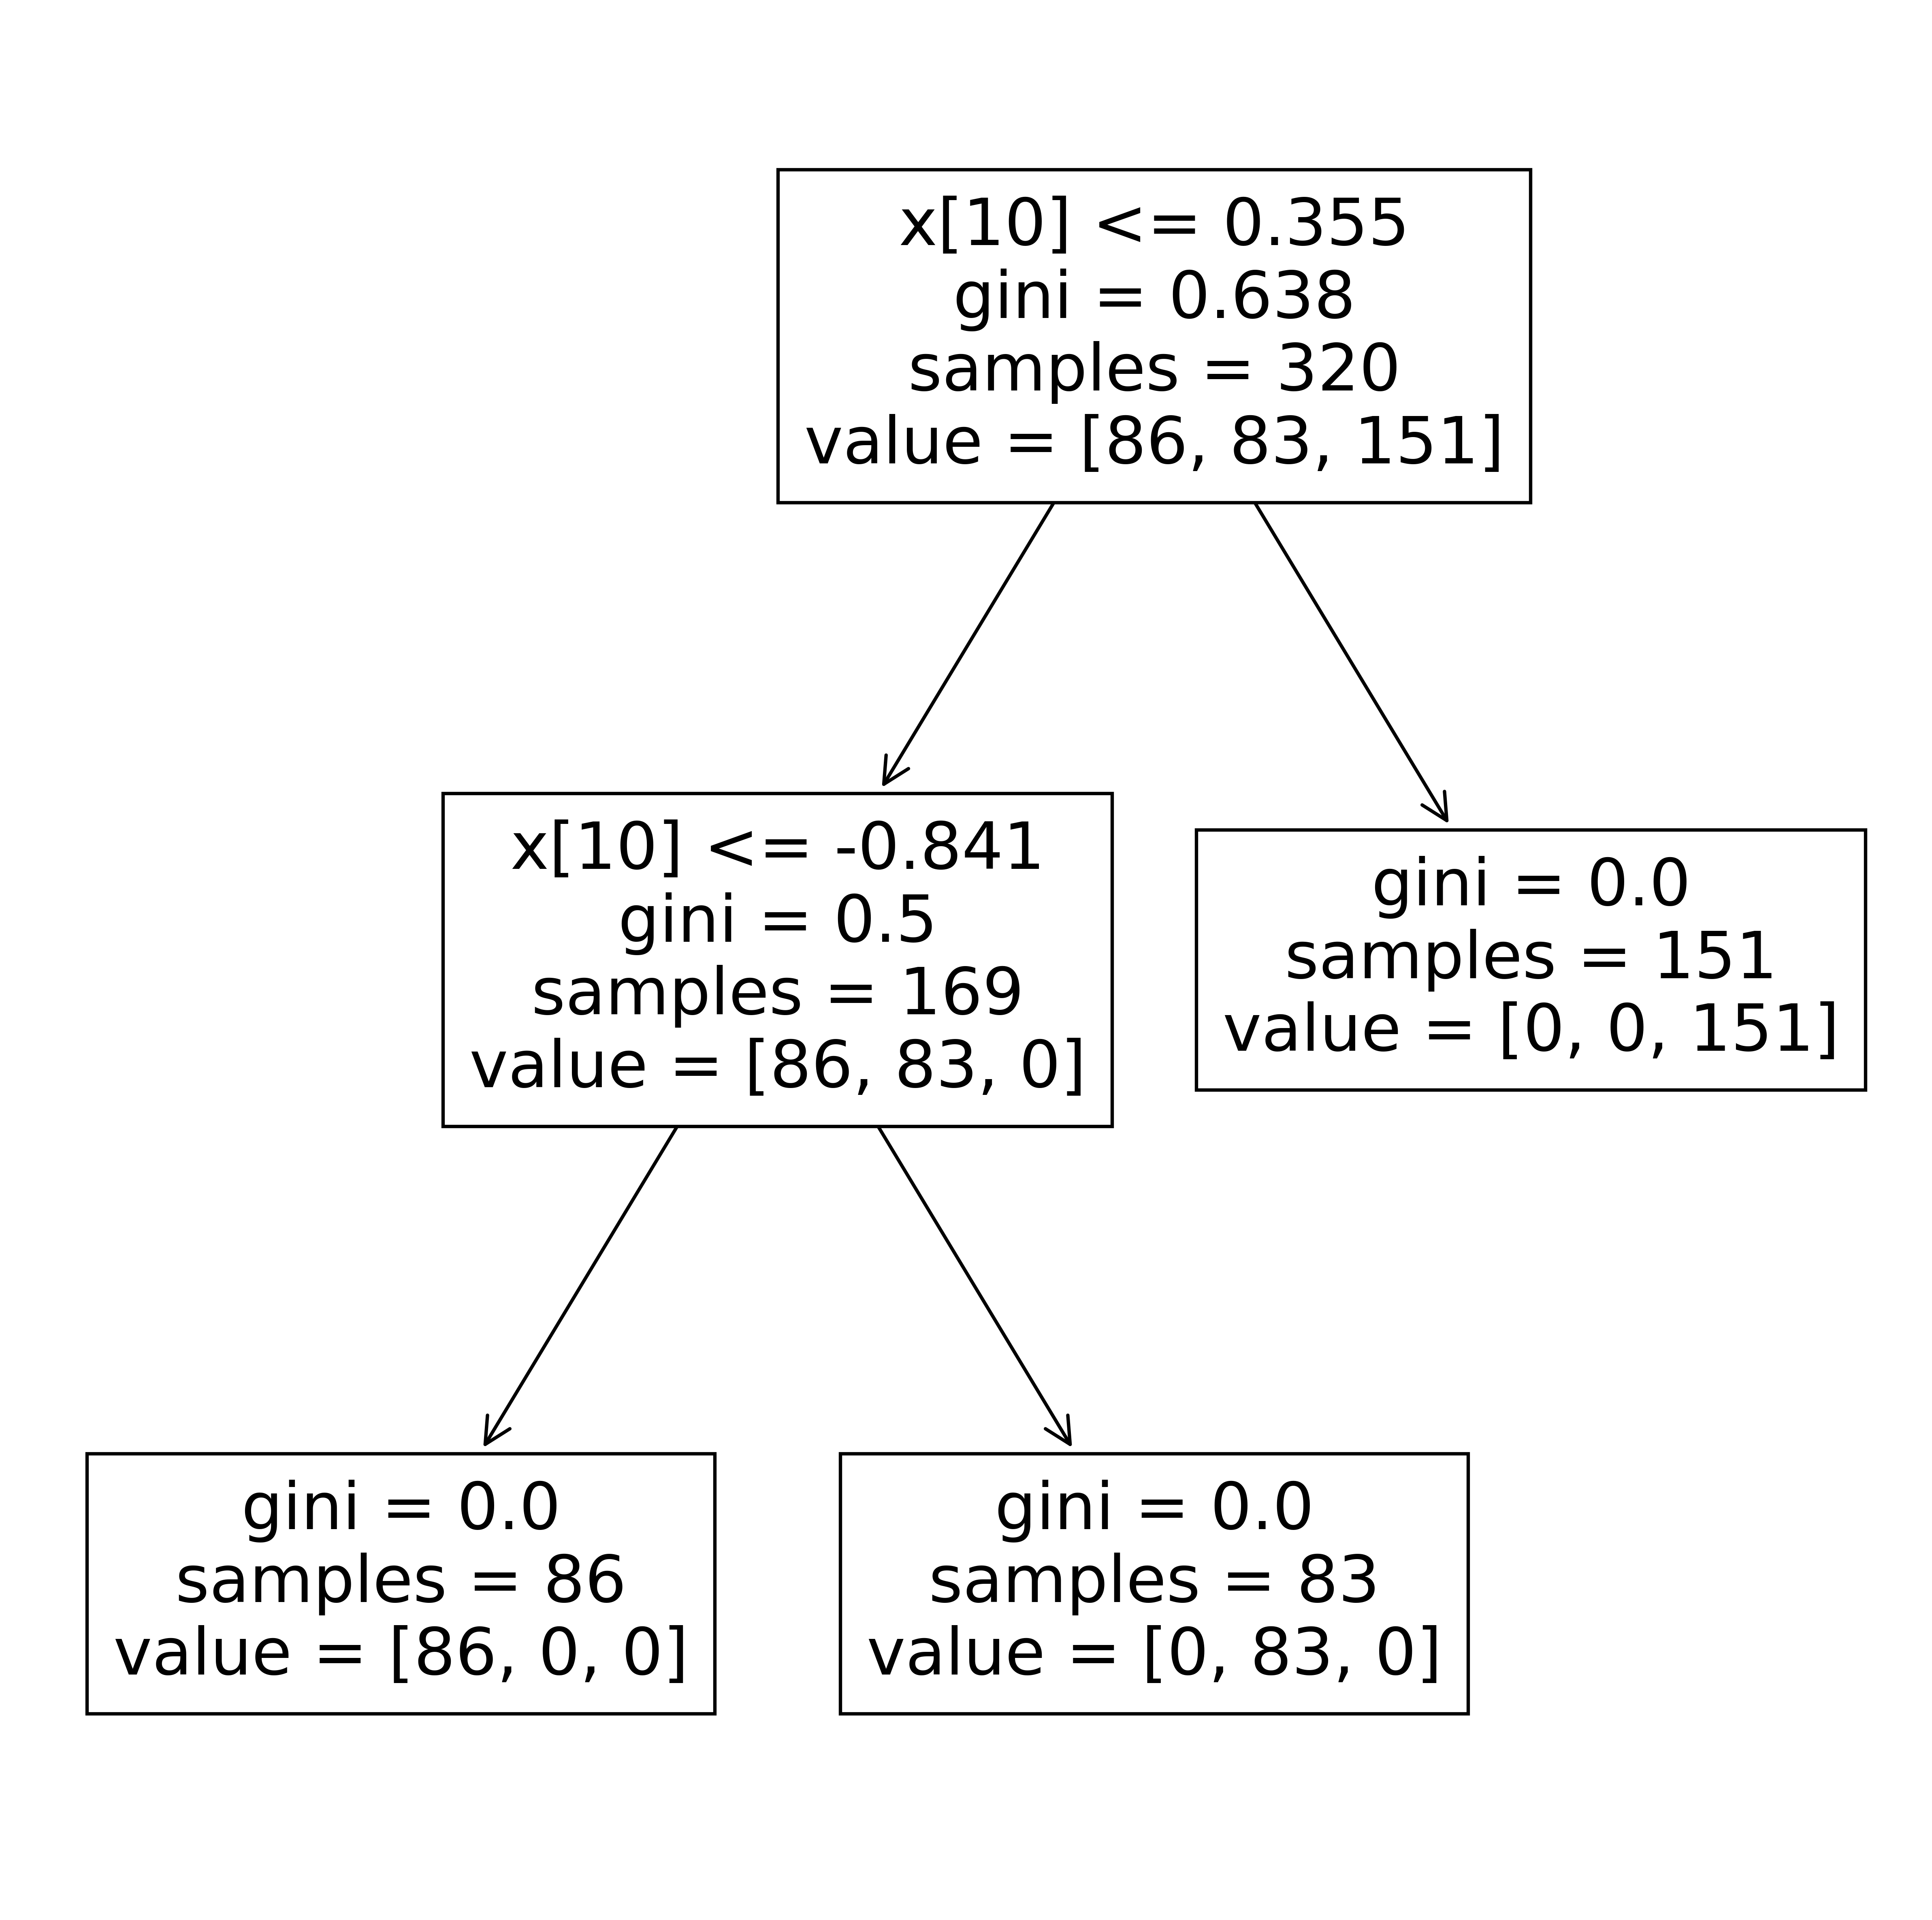

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=600)
tree.plot_tree(model)
plt.show()